# SigPlot Jupyter Notebook Extension!

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/LGSInnovations/jupyter-sigplot/master?filepath=example%2FJupyterSigplot.ipynb)

## Installation (If not running the notebook on [myBinder](https://mybinder.org/v2/gh/LGSInnovations/jupyter-sigplot/master?filepath=example%2FJupyterSigplot.ipynb))
- Download extension from [GitHub](https://github.com/LGSInnovations/jupyter-sigplot)
- Install Python 2.6+ or 3.5+
- Install `pip` (usually bundled with Python)
- Install Jupyter using `pip` (or install the Anaconda platform, which also includes Jupyter)

```
pip install jupyter
```

- Install the SigPlot Jupyter Notebook extension (run the following in order)

```
[/path/to/jupyter_sigplot]$ python setup.py install
[/path/to/jupyter_sigplot]$ jupyter nbextension install --py --symlink --sys-prefix jupyter_sigplot
[/path/to/jupyter_sigplot]$ jupyter nbextension enable jupyter_sigplot --py --sys-prefix
```
- To launch the notebook, simply run

```
$ jupyter notebook
```

- (Note: you do not need X-MIDAS installed to use  [SigPlot](https://github.com/lgsinnovations/sigplot).)

## sigplot.Plot Usage
- `Plot(args*, kwargs*)` - creates a sigplot with each arg as input data and kwargs as options
- `overlay_array(data)` - adds an array of numbers to the sigplot's input data
- `overlay_href(path)` - adds data from a file or URI to the sigplot
- `change_settings(**kwargs)` - changes the options of the sigplot
- `plot(*args)` - displays an interactive sigplot

(Note: Changing the kernel's current working directory will affect relative data paths.)

In [1]:
# The only import you _need_ for plotting is `jupyter_sigplot.sigplot.Plot`.
from jupyter_sigplot.sigplot import Plot

# We'll import `numpy` too to show how to plot a `numpy` array.
import numpy as np

Plot(plot_options={'noxaxis': True, 'noyaxis': True, 'xi': True}, uuid='a26aadac-51ce-454f-b97a-ce06b98f0158')


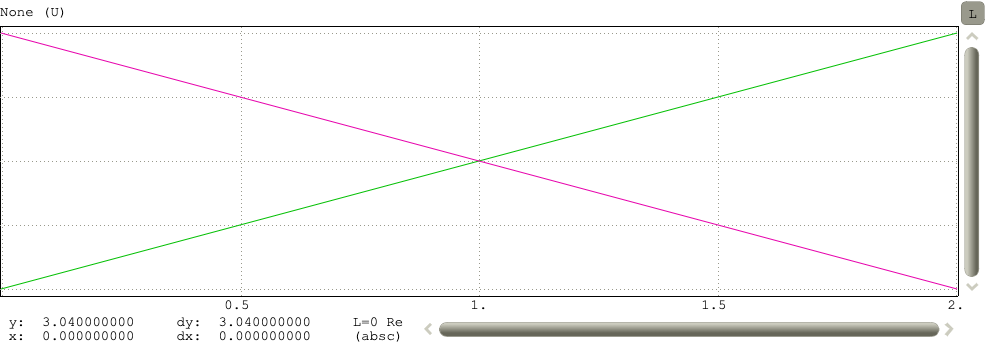

In [2]:
# self-explanatory, but we're instantiating a `jupyter_sigplot.sigplot.Plot` object
# and saying do not show the x and y axes.
plot = Plot(noxaxis=True, noyaxis=True, xi=True)

# Multiple `overlay_*` calls will layer on top of one-another
plot.overlay_array((1,2,3))
plot.overlay_array([3,2,1])

In [3]:
# you can change settings after the plot is instantiated,
# so we'll add cross-hairs and show the x axis!
plot.change_settings({'cross': True, 'show_x_axis': True})

Plot(plot_options={'noxaxis': True, 'noyaxis': True}, uuid='f29b48c3-e815-40a1-a486-294196be972c')


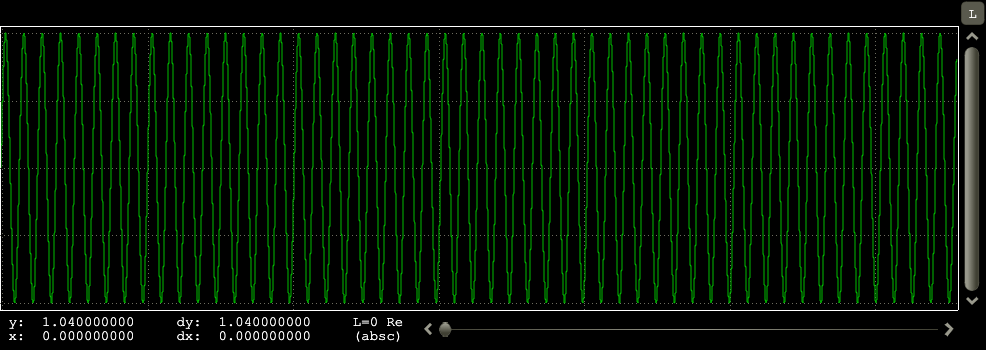

CPU times: user 583 ms, sys: 255 ms, total: 837 ms
Wall time: 967 ms


In [4]:
%%time

# self-explanatory, but we're instantiating a `SigPlot` object
# and saying do not show the x and y axes.
plot = Plot(noxaxis=True, noyaxis=True)

# Multiple `overlay_*` calls will layer on top of one-another
x = np.arange(0, 200e3, .01)
plot.overlay_array(np.sin(x))

Plot(plot_options={'noxaxis': True, 'noyaxis': False}, uuid='42ddd815-71cc-47fb-aa17-adfd51c1c9a1')


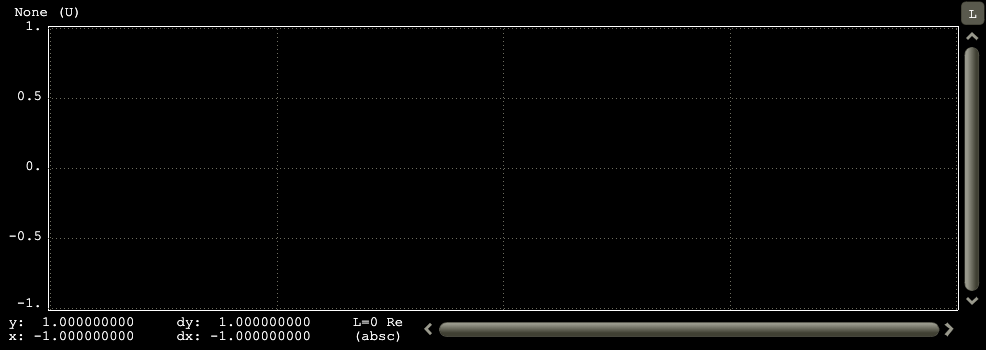

In [5]:
plot = Plot(noxaxis=True, noyaxis=False)

# overlay_href() can accept a local Jupyter file or an arbitrary URI;
# if it's an http or https URI, it will copy the file locally to
# avoid dealing with cross-origin resource sharing (CORS)
plot.overlay_href("http://sigplot.lgsinnovations.com/dat/pulse.tmp")

Plot(uuid='74a64273-8e2f-4189-8c8d-dd2b6d19d4f8')


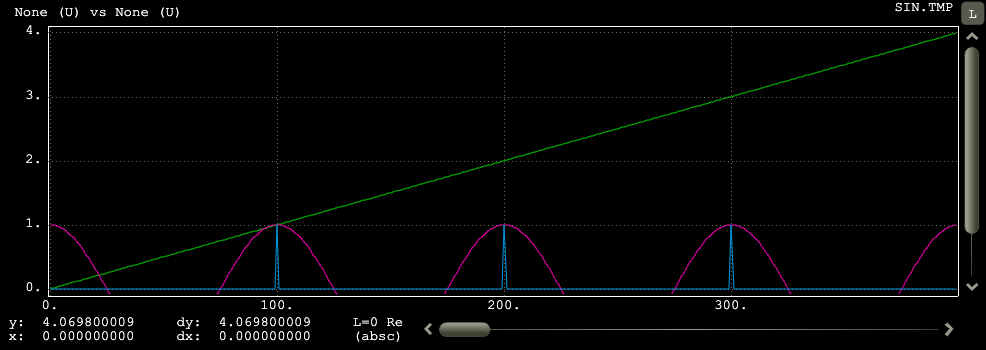

In [6]:
# You can also plot mixed-types (i.e., hrefs and arrays)
plot = Plot()
plot.overlay_href("http://sigplot.lgsinnovations.com/dat/sin.tmp")
plot.overlay_href("http://sigplot.lgsinnovations.com/dat/pulse.tmp")
plot.overlay_array(np.arange(0, 4, .01))

Plot(uuid='c5f684fa-39c1-4c0c-bd71-4434ffea6a44')


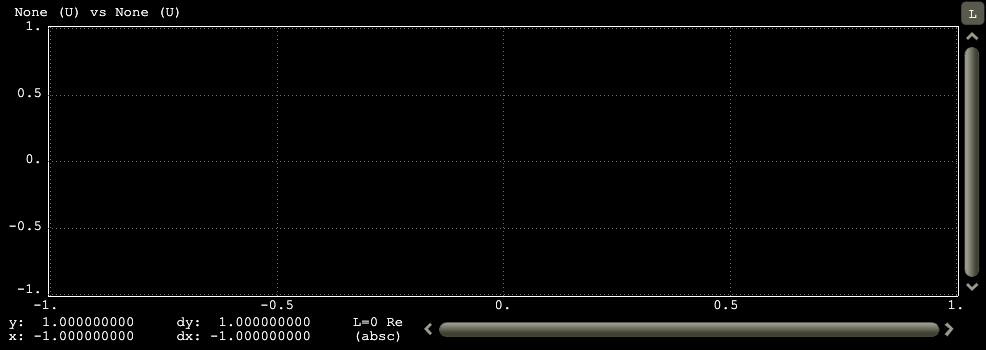

In [7]:
# once the resource is local,
# you can just refer to the filename
# Note: changing the kernel's current working directory will affect
# relative data paths.
# Note: Running this will affect the previous cell's plot
plot = Plot()
plot.overlay_href("sin.tmp")

Plot(uuid='895d439e-5842-42b7-bf4b-e9f38b814f2b')


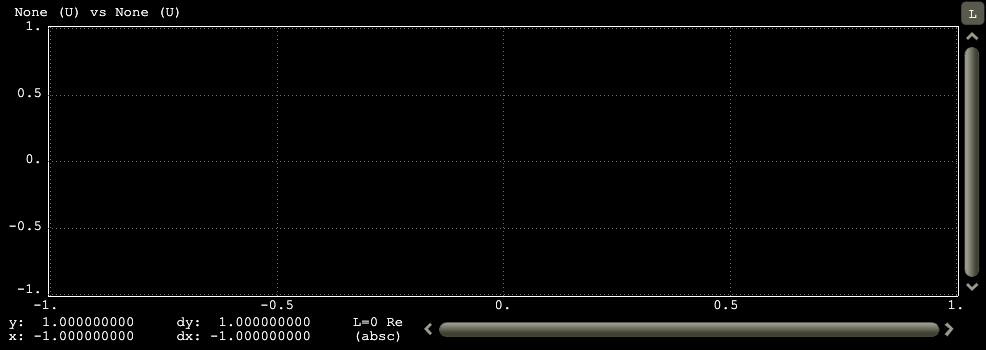

In [8]:
# penny.prm is a type-2000 file, meaning it's layed out as
# a 2-dimensional matrix, so `plot()` will by default plot each row
# individually in a 1-D plot
plot = Plot()
plot.overlay_href("http://sigplot.lgsinnovations.com/dat/penny.prm")

Plot(uuid='899df386-4bc1-4218-b1d5-2bdd323b1bce')


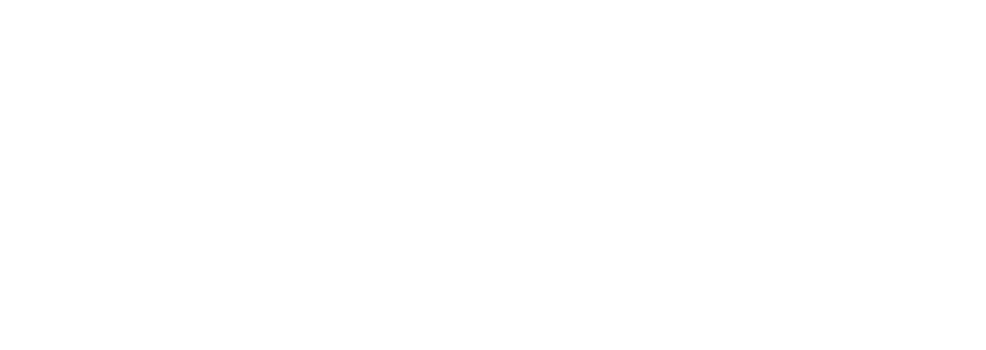

In [9]:
plot = Plot()

# we can also force SigPlot to plot 1-dimensional arrays
# as a heatmap/raster setting `subsize` to how many
# elements should be in each row
plot.overlay_array([1,2,3,2,3,4,1,2,3], {'subsize': 3})

Plot(uuid='919731b6-a45a-4ef2-922f-992fe0974265')


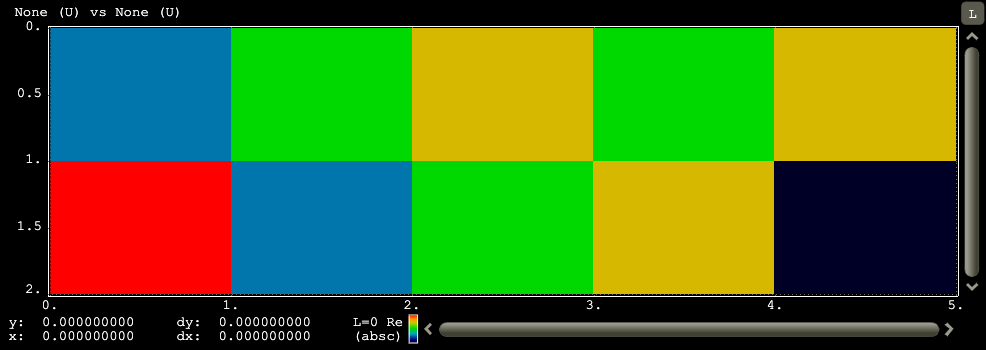

In [10]:
plot = Plot()
plot.overlay_array([1,2,3,2,3,4,1,2,3], {'subsize': 5})

Plot(uuid='18ff2366-3fe9-423e-961b-e638298c84f2')


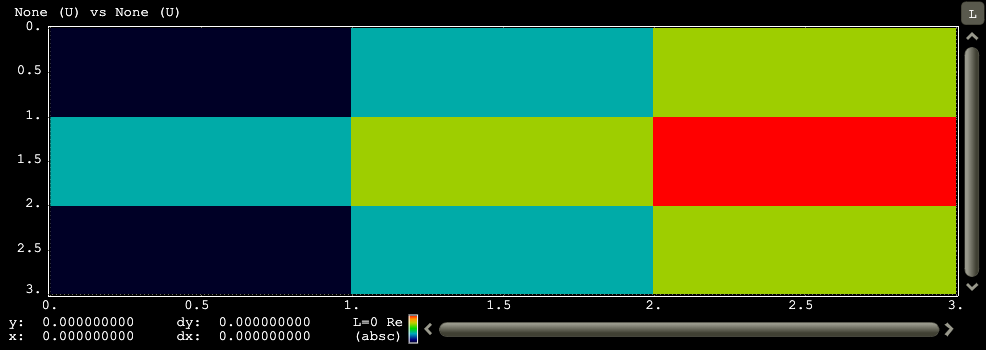

In [11]:
plot = Plot()

# alternatively, you can just pass a 2-dimensional array/list
# and as long as "subsize" is passed, it will plot it correctly
plot.overlay_array([[1,2,3],[2,3,4],[1,2,3]], {'subsize': 3})

Plot(uuid='2cf06d57-c5a5-436e-91a4-25a0873728ab')


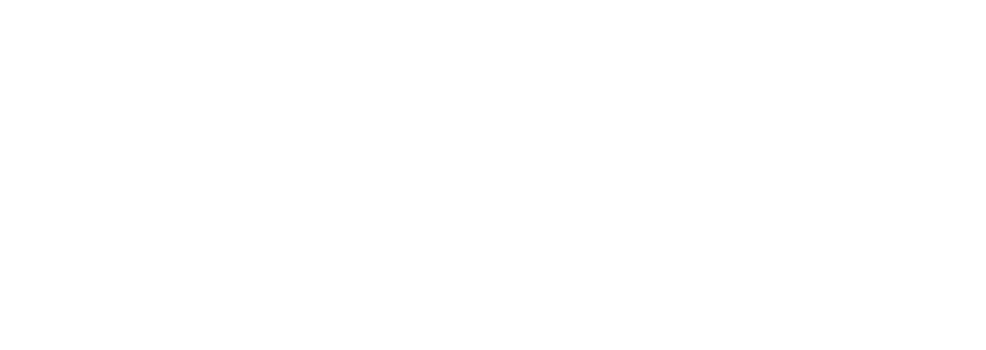

In [12]:
plot = Plot()

# you can also specify multiple files using '|' as
# the delimiter
plot.overlay_href('pulse.tmp|sin.tmp')